<b>Simple-Linear-Regression (SLR) - Scratch</b> <br>
<i>Implementing linear regression using only NumPy, step-by-step. </i>

<b>requirements</b>

In [90]:
# example:- pip install numpy

<b>imports</b>

In [91]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets


<b>(1) DATA PRE-PROCESSING</b>

In [92]:
# Generate Synthetic Data
# Features (X) & Dependent-Variable(y)
X, y = datasets.make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=42, cluster_std = 1.3)

# Data-Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 134)

# Data Pre-Processing
# Normalize (if needed)


<b>(2) ML ALGORITHM - SCRATCH</b>

In [93]:
# FUNCTIONS 
# Euclidean Distance Between Two Points 
def euclidean_distance(X,centroids) -> np.ndarray:
    """
    Calculates Euclidean-Distances between Two Array of points.
    Precisely, this function calculates Eucl-Dist between each Datapoints(X) and all Centroids
    
    Parameters: 
        X : (np.array) Independent-Variable (Features-Matrix) 
        centroids : (np.array) An Array of k-number of Centroids
        
    Returns :     
        Eucl-Distances of all points to each centroids in a numpy array
    """
    
    # Norm-2 : Euclidean Distance
    eucl_distances = np.zeros((X.shape[0], centroids.shape[0]))
        
    for i, centroid in enumerate(centroids):
        # Norm-2 Euclidean Distance along each rows (axis=1)
        eucl_distances[:, i] = np.linalg.norm(X - centroid, axis=1) 
    return eucl_distances
    

In [94]:
class KMeans: 
    
    # (2.1) Initiaize Model-Parameters
    def __init__(self, k=3, iters=10000, tol=1e-4) -> None:
        """
        Initialize Model-Parameters
        
        Parameters: 
            k : (int) Number of Clusters , default = 3
            iters : (int) Number of Training Iterations , default = 1000
            tol : (float) Tolerance Level, default = 1x10^-4
        
        Returns:
            Nothing
        """
        
        self.k = k
        self.iters= iters
        self.tol = tol
        self.centroids = None
        
    
    # (2.2) Fit-Model
    def fit(self, X) -> None:
        """
        Fits andd Trains Model to Data X. After Training gives us the learned Centroids
        
        Parameter :
            X : (np.array) Independent-Variable (Features-Matrix) 
        
        Returns : 
            Nothing
        """
        
        # Step-01 : Initialize Random Centroids   
        np.random.seed(42) # Enable Reproducibility 
        random_indices = np.random.permutation(X.shape[0]) # Select Dataset-X's Row's Indices Randomly
        self.centroids = np.array(X[random_indices[:self.k]]) # :self.k = select First k-num Centroids, Select the Datapoints/rows from X with indices = random_indices[:self.k] and assign as new k centroids
        
        # debugging
        # print("Fit_func, Random Indices: {0}".format(random_indices))
        # print(f"Fit_Func, random_indices indexing : {random_indices[:self.k]}")
        # print(f"Fit_Func, Init Centroids : {self.centroids}")
        
        
        # Training KMC Algorithm To find Centroids / Iteratively Optimize centroids
        for i in range(self.iters):
   
            # Step-02 : Assign Clusters(Datapoints) to nearest Centroids
            self.labels = self._assign_Clusters(X) # For each row of Dataset, get a corresponding cluster/centroid label           
            
            #debugging 
            # print(f"Fit_Func, labels of X rows : {labels}")
            # print(cluster_labels)
            
            # Step-03 : Calculate Cluster's Mean + Step-04 : Update Centroids
            new_centroids = np.array([self._calculate_centroids(X[self.labels == class_label]) for class_label in np.unique(self.labels)])
           
            #debugging
            #print(f"labels-X : {X[labels == 1]}")
            #print(f"old centroid : {self.centroids} new centroid : {new_centroids}")
            
            # Step-05 : Check for convergence
            if np.all(np.linalg.norm(self.centroids - new_centroids, axis=1) < self.tol):
                break
            
            # Assign Newly learned centroids as final centroids after training by replacing old centroids
            self.centroids = new_centroids
    
    
    # (2.3) Assign Clusters/Datapoints(X) to Nearest Centroids
    def _assign_Clusters(self,X) -> np.ndarray:
        """
        Assign X-points to it's nearest centroids. Bascially assign cluster of X-points to its nearest centroids
        
        Parameters: 
            X : (np.array) Indepenent-Variables (Features-Matrix) of a certain cluster
        
        Returns: 
            Newly learned Centroid of each cluster which are the Means of each cluster.
        Return : 
        
        """
        
        # Calculates Distances of Each Datapoints to each centroids, So for 1 datapoint 3-Distances for 3 centroids
        # e.g- first datapoint, x[1] = [2 3], then Distances[1] = [ Dist(X[1],C1), Dist(X[1],C2), Dist(X[1],C3)]
        distances = euclidean_distance(X,self.centroids) # List Comprehension
        #print(f"Distances: {distances}")
        
        # Returns the index of min distance of each row (axis=1) . Here index represnets to cluster mnumber
        # e.g- Distances[1] = min of [ Dist(X[1],C1), Dist(X[1],C2), Dist(X[1],C3)] = 2
        # Similartly Distances[2] = 1, Distances[3] =2 .. so on so Distances = [1 1 1 1 1 2 2 0 0 0]
        return np.argmin(distances, axis=1)
    
    
    # (2.4) Calculate Mean and Assign them as new centroids
    def _calculate_centroids(self,X) -> np.ndarray:
        """
        Calculates the mean of Datapoints of each clusters columwise
            
        Parameters: 
            X : (np.array) Indepenent-Variables (Features-Matrix) of a certain cluster
        
        Returns: 
            Newly learned Centroid of each cluster which are the Means of each cluster.
            
        """
        
        # Moving Centroids to Mean
        new_centroids = np.mean(X, axis=0) # mean is calculated col wise, meaning x1=(1,2), x2=(3,2), mean of X = ((1+3)/2, (2+2)/2)
        
        #debugging
        #print(f"cluster mean : {new_centroids}")

        # returns the newly Learned centroids
        return new_centroids
   
    
    # (2.5) Estiate cluster labels of new Test Data
    def predict(self, X) -> np.ndarray:
        """
        Predict the possible cluster of the new data X
        
        Parameters: 
            X : (np.array) Indepenent-Variables (Features-Matrix), X_test in this case
        
        Returns: 
            Newly learned Centroid of each cluster which are the Means of each cluster.
        """
        
        # Returns predicted cluster labels for X
        return self._assign_Clusters(X)

<b>(3) MODEL TRAINING</b>

In [95]:
# Creating KMeans Instance
kmc = KMeans()

import time
start = time.time()

# Fit (Training) The KMC model with the Training-Datasets
kmc.fit(X_train)


end = time.time()
print(f"time elapsed : {(end-start)*1000} ms\n")


time elapsed : 1.9996166229248047 ms



<b>(4) PREDICTION</b>

In [96]:
# Predicting on Test-Set using the trained KMC model (by the learned 'cenroids')
predictions = kmc.predict(X_test)
#print(f"\nPredicted Class-Label : {predictions}")

<b>(5) EVALUATION-VISUALIZATION</b>

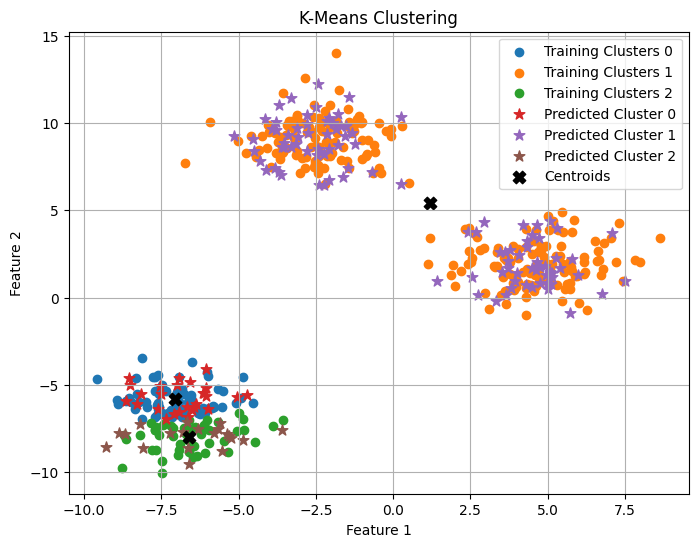

accuracy : 46.0 %


In [97]:
# Visualization 
# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot each Training cluster's points
for i in range(kmc.k):
    cluster_points = X_train[kmc.labels== i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Training Clusters {i}')
     
# Plot each Test cluster's points   
for j in range(kmc.k):
    test_cluster_points = X_test[ predictions== j]
    plt.scatter(test_cluster_points[:, 0], test_cluster_points[:,1], s = 65 ,marker = '*', label=f'Predicted Cluster {j}')

# Plot the centroids
plt.scatter(kmc.centroids[:, 0], kmc.centroids[:, 1], s=80, c='black', label='Centroids', marker='X')

 # Customize the plot
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


# (3.2) Metrics 
# Accuracy
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"accuracy : {accuracy*100} %")

<b>CONCLUSION</b>
- The model is kmc